In [ ]:
import numpy as np
import cv2

In [ ]:
def change_brightness(img, alpha, beta):
    img_new = np.asarray(alpha*img + beta, dtype=int)   # cast pixel values to int
    img_new[img_new>255] = 255
    img_new[img_new<0] = 0
    return np.array(img_new, dtype=np.uint8)

In [ ]:
image_eye_left_1 = cv2.imread("D:/User/ESP32_DOIT/scripts/kitchenrobot.jpg")
image_eye_left_2 = cv2.imread("D:/User/ESP32_DOIT/scripts/smilerobot.jpg")
image_eye_left_1 = cv2.resize(image_eye_left_1, [523,630])
image_eye_left_2 = cv2.resize(image_eye_left_2, [523,630])

print(image_eye_left_1.shape)
print(image_eye_left_2.shape)
# image_processed = change_brightness(image, 1, 35)
eyes = cv2.hconcat([image_eye_left_1, image_eye_left_2])

cv2.imshow("image", eyes)
cv2.imwrite("imagerobot.png", eyes)
cv2.waitKey(0)

In [ ]:
import os
import pandas as pd

path = 'D:/User/ESP32_DOIT/scripts/image_102.txt'
# read text file into pandas DataFrame
df = pd.read_csv(path, sep=" ", header=None)

# display DataFrame
print(df[0])
for i in range(len(df[0])):
    df[0][i] = 45
    

print(df[0])
df.to_csv(path, sep=' ', index=False, header=False)


In [ ]:
names = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]
names[32]

In [ ]:
import pandas as pd 
import numpy as np
box1 = [100,100,100,100]
box2 = [100,100,100,100]
state = [0,0,0,0]
df = pd.read_csv("D:/User/Bot_C/Res/scripts/control.csv")
if df.empty:
    print('DataFrame is empty!')
data_frame = []
# # data_frame.append(box1)
data_frame.append(box2)
data_frame.append(state)
data_frame = np.reshape(data_frame, (1,8))

# # df2 = pd.DataFrame(data_frame, columns=['x1', 'x2', 'x3', 'x4',
# #                                         'y1', 'y2', 'y3', 'y4',
# #                                         'q1', 'q2', 'q3', 'q4'])
df2 = pd.DataFrame(data_frame, columns=['c11', 'c12', 'c21', 'c22', 'q1', 'q2', 'q3', 'q4'])

# df2 = pd.concat([df,df2])
df2.to_csv("D:/User/Bot_C/Res/scripts/control.csv", index=False)

df2


In [ ]:
import torch.nn as nn
import tqdm
import torch
class ANN(nn.Module):
    def __init__(self):
        super().__init__()

        # self.relu1 = nn.ReLU(inplace=True)
        self.liner1 = nn.Linear(8,128)
        self.relu = nn.ReLU()
        self.liner2 = nn.Linear(128,8)
        self.liner3 = nn.Linear(8,4)

        # self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.relu(self.liner1(x))
        out = self.relu(self.liner2(out))
        out = self.relu(self.liner3(out))

        return out

In [ ]:
model = ANN()
tensor = torch.rand([1, 8])
model(torch.tensor([X[0]], dtype=torch.float32))
# 

# tensor


# Model ANN

In [15]:
from model_ANN import ANN
import torch.nn as nn
import tqdm
import torch
def study(model, X, y, optimizer, losses, device):
    model.train()
    train_loss = 0
    # counter = 0
    # print ("@@@ Start train model @@@")
    for i, data in enumerate(X):
        # counter += 1
        image, label = torch.tensor(data,dtype=torch.float32), torch.tensor(y[i],dtype=torch.float32)
        image = image.to(device)
        label =label.to(device)
        optimizer.zero_grad()
        label_pre = model(image)
        # print(label_pre.shape)
        loss = losses(label_pre, label)
        train_loss += loss.item()
        # print(train_loss)
        loss.backward()
        optimizer.step()
        # print(preds)
    epoch_loss = train_loss / len(X)

    return epoch_loss

In [30]:
def create_batch_data(Train_X, Train_y, batch):
    X, y = [], []
    XX, yy = [], []
    j=0
    while j < len(Train_y):
        X.append(Train_X[j])
        y.append(Train_y[j])
        if (j+1)%batch==0:
            XX.append(X)
            yy.append(y)
            X, y = [], []
        j+=1
    return np.array(XX), np.array(yy)

In [31]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:/User/DLBot/scripts/data/angles.csv")
# df.head()
data = np.array(df)
X = np.array(data[:,0:8]/400, dtype=np.double) 
y = np.array(data[:,8:12]/180, dtype=np.double)
X_train, y_train = create_batch_data(X, y, 32)
X_train.shape

(12, 32, 8)

In [37]:
# from sklearn import svm
import torch.optim as optim

# df = pd.read_csv("D:/User/Bot_C/Res/scripts/data_control.csv")

# print(y)
PATH = "D:/User/DLBot/scripts/model/model_arm.pt"
learning_rate = 0.001
model = ANN()
model.load_state_dict(torch.load(PATH))
# total_params = sum(p.numel() for p in model.parameters())
# print(f"{total_params:,} total parameters.")
# total_trainable_params = sum(
#     p.numel() for p in model.parameters() if p.requires_grad)
# print(f"{total_trainable_params:,} training parameters.")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
# Loss function.
# losses = nn.CrossEntropyLoss()
losses = nn.MSELoss()
loss = []
# evaluate a model using repeated k-fold cross-validation
for i in range(10000):
    train_loss = study(model, X_train,y_train, optimizer, losses, device)
    loss.append(train_loss)
    if i%10==0:
        print('epoch: ',i, 'loss: ', train_loss)
torch.save(model.state_dict(), PATH)


cpu
epoch:  0 loss:  0.0002618244167630716
epoch:  10 loss:  0.0002618002545204945
epoch:  20 loss:  0.0002617760910652578
epoch:  30 loss:  0.0002617518875922542
epoch:  40 loss:  0.0002617277641547844
epoch:  50 loss:  0.0002617035497678444
epoch:  60 loss:  0.00026167941420377855
epoch:  70 loss:  0.00026165522285737097
epoch:  80 loss:  0.0002616310860806455
epoch:  90 loss:  0.0002616069262633876
epoch:  100 loss:  0.0002615827943373006
epoch:  110 loss:  0.00026155860905419104
epoch:  120 loss:  0.00026153459354342584
epoch:  130 loss:  0.00026151051254904206
epoch:  140 loss:  0.0002614864642964676
epoch:  150 loss:  0.0002614623711754878
epoch:  160 loss:  0.00026143836172802065
epoch:  170 loss:  0.00026141431953874417
epoch:  180 loss:  0.0002613903755748955
epoch:  190 loss:  0.0002613663176210442
epoch:  200 loss:  0.00026134228755836375
epoch:  210 loss:  0.0002613182526450449
epoch:  220 loss:  0.0002612942565368333
epoch:  230 loss:  0.00026127026285394095
epoch:  240 lo

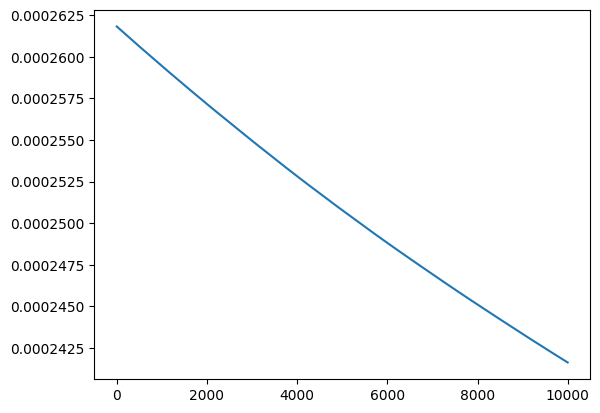

In [38]:
import matplotlib.pyplot as plt
# path = 'D:/User/DLBot/scripts/data/log.csv'
# df = pd.read_csv(path)

# df2 = pd.DataFrame(loss, columns=['loss'])
# df2 = pd.concat([df, df2])
# df2.to_csv(
#     path, index=False)

plt.plot(loss)
plt.show()

In [12]:
torch.save(model.state_dict(), PATH)

In [ ]:
df_test = pd.read_csv("D:/User/Bot_C/Res/scripts/data_control.csv")
data = np.array(df_test)
X_t = np.array(data[:,0:8], dtype=np.double) 
y_t = np.array(data[:,8:12], dtype=np.double)
    

In [ ]:
from cacular import *
data_create = []
for idx, dta in enumerate(X_t):
    box_1, box_2 = dta[:4], dta[4:]
    data_frame = np.hstack(
                        [center_box(box_1), center_box(box_2), y_t[idx]])
    data_create.append(data_frame)
df = pd.read_csv("D:/User/Bot_C/Res/scripts/control.csv")
df2 = pd.DataFrame(data_create, columns=['c11', 'c12', 'c21', 'c22', 'q1', 'q2', 'q3', 'q4'])
df2 = pd.concat([df, df2])
df2.to_csv(
    "D:/User/Bot_C/Res/scripts/control.csv", index=False)
X_t
data_create

In [39]:
the_model = ANN()
the_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [40]:
output = the_model(torch.tensor([X[:10]],dtype=torch.float32))*180
ou = np.array(output.detach().numpy()[0],dtype=np.int8)
# len(str(ou[0]))
ou

array([[104,  44,  63,  11],
       [ 95,  50,  69,  12],
       [ 92,  49,  72,  12],
       [ 85,  45,  70,  11],
       [103,  46,  56,   9],
       [ 87,  34,  90,  12],
       [102,  46,  64,  11],
       [ 83,  47,  95,  10],
       [101,  39,  80,  11],
       [102,  46,  58,  11]], dtype=int8)

In [ ]:
# from tracker.track import *
import cv2
# url1 = 'http://192.168.2.110/cam-lo.jpg'
frame = cv2.imread("D:/User/firmware/Screen/hinh-anh-mat-cuoi2-1.png")

speed = 0
def callback(data):
    global speed
    speed = data
cv2.namedWindow('test')
cv2.createTrackbar('thrs1', 'test', 0, 250, callback)


while True:
# try:
# cap = cv2.VideoCapture(url1)
    print(speed)
    cv2.imshow("image", frame)
    cv2.waitKey(1)
# Do whatever you want with contours
# cv2.imshow('test', frame)
# _, frame = cap.read()
# box, frame, area = tracking_sort(frame)
# idx = len(box[0])
# print(box[0][len(box[0])-1])
# print()

In [ ]:
def convert_map(angle, inmax, inmin, outmax, outmin):
    return (angle-inmin)*(outmax-outmin)/(inmax-inmin) + outmin

areas = 15000
different = 15000 - areas
speed = convert_map(different, 15000, 0, 255, 150)
print(speed)

In [ ]:
import pandas as pd
path_csv = "D:/User/Bot_C/Res/scripts/data/locals.csv"

idx_name = 2
# df = pd.read_csv(path_csv)
# data_create = [['imagel_1.png', 'imager_1.png', 'f']]
# df2 = pd.DataFrame(data_create, columns=['imagel', 'imager', 'action'])
name_l = "imagel_{}.png".format(idx_name)
name_r = "imager_{}.png".format(idx_name)
data_frame = []
data_out = 1
#  = control_keyboard(sv, key)
data_frame.append(name_l)
data_frame.append(name_r)
data_frame.append(data_out)
df2 = pd.DataFrame([data_frame], columns=['imagel', 'imager', 'action'])

# df2 = pd.DataFrame(data_create, columns=['c11', 'c12', 'c21', 'c22', 'q1', 'q2', 'q3', 'q4'])
# df2 = pd.concat([df, df2])
df2.to_csv(
    path_csv, index=False)

In [ ]:
import os
path_save_l = "D:/User/data_map/left/"
path_save_r = "D:/User/data_map/right/"
idx_name = len(os.listdir(path_save_l))

print(idx_name)

In [14]:
import torch.optim as optim
# from model_CNN import Net
import torch.nn as nn
import pandas as pd
import numpy as np
import torch
import cv2
from sklearn import preprocessing

PATH = 'D:/User/DLBot/scripts/model/move_model.pt'
# net = Net()
# net.load_state_dict(torch.load(PATH))

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.5)


path_csv = "D:/User/DLBot/scripts/data/locals.csv"
path_save_l = "D:/User/data_map/left/"
path_save_r = "D:/User/data_map/right/"

df = pd.read_csv(path_csv)
Train_y = df['action']

# X = np.array(df['deceduti']).reshape(-1,1)
chuyenDoi = preprocessing.LabelEncoder()
chuyenDoi.fit(Train_y)
Train_y = chuyenDoi.transform(Train_y)


# df = np.array(df)

# Train_X = []
# print(Train_y)
# for data in df:
#     row_data = []
#     # print(data)
#     image1 = cv2.imread(path_save_l+data[0])
#     image2 = cv2.imread(path_save_r+data[1])
    
#     row_data.append(image1)
#     row_data.append(image2)
    
#     Train_X.append(row_data)
    
# print(np.array(Train_X).shape)

In [ ]:
from sklearn.model_selection import train_test_split
Train_X, Val_X, Train_y, Val_y = train_test_split(Train_X, Train_y, test_size=0.2)

In [ ]:
len(Train_X), len(Val_X)

In [ ]:
def create_batch_data(Train_X, Train_y, batch):
    X, y = [], []
    XX, yy = [], []
    j=0
    while j < len(Train_y):
        X.append(Train_X[j])
        y.append(Train_y[j])
        if (j+1)%batch==0:
            XX.append(X)
            yy.append(y)
            X, y = [], []
        j+=1
    return XX, yy

In [ ]:
tx, ty = create_batch_data(Train_X, Train_y, 32)
tx = np.array(tx,dtype=np.uint8)/255
ty = np.array(ty,dtype=np.uint8)
tx[:,:,0].shape

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Train_y)
plt.title("Histogram")
plt.show()
plt.hist(Val_y)
plt.title("Histogram")
plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch, cv2
import torch.nn as nn

from model_CNN import Net
PATH_best = 'D:/User/DLBot/scripts/model/move_model_new_1.pt'

# model = Net()
# # model.to(device)
# model.load_state_dict(torch.load(PATH))

# error = nn.CrossEntropyLoss()

# learning_rate = 0.001
# # optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# num_epochs = 5
# count = 0
# # Lists for visualization of loss and accuracy 
# loss_list = []
# iteration_list = []
# accuracy_list = []

# # Lists for knowing classwise accuracy
# predictions_list = []
# labels_list = []
# predictions_list_train = []
# max = 0
# for epoch in range(num_epochs):
#     correct_train = 0
#     total_train = 0
#     for i, data in enumerate(Train_X):
#         # Transfering images and labels to GPU if available
#         # images, labels = images.to(device), labels.to(device)
#         image1 = cv2.resize(data[0], [255,255]).transpose([2,0,1])/255
#         image2 = cv2.resize(data[1], [255,255]).transpose([2,0,1])/255
#         inputs1, inputs2, labels = torch.tensor([image1],dtype=torch.float32), torch.tensor([image2],dtype=torch.float32), torch.tensor([Train_y[i]],dtype=torch.long)
        
#         # Forward pass 
#         outputs = model(inputs1, inputs2)
#         loss = error(outputs, labels)
#         predictions_train = torch.max(outputs, 1)[1]
#         predictions_list_train.append(predictions_train)
#         correct_train += (predictions_train == labels).sum()

#         total_train += len(labels)

#         accuracy_train = correct_train * 100 / total_train
#         # Initializing a gradient as 0 so there is no mixing of gradient among the batches
#         optimizer.zero_grad()
        
#         #Propagating the error backward
#         loss.backward()
        
#         # Optimizing the parameters
#         optimizer.step()
    
#         count += 1
#         # if not (count % 10):
#             # print("Iteration: {}, Loss: {}, Accuracy: {} %, Correct: {}".format(count, loss.data, accuracy_train, correct_train))
#     # Testing the model
    
#         if not (count % 10):    # It's same as "if count % 50 == 0"
#             total = 0
#             correct = 0
        
#             for j, valda in enumerate(Val_X):
#                 # images, labels = images.to(device), labels.to(device)
#                 # labels_list.append(labels)
            
#                 # test = Variable(images.view(100, 1, 28, 28))
#                 imagev1 = cv2.resize(valda[0], [255,255]).transpose([2,0,1])/255
#                 imagev2 = cv2.resize(valda[1], [255,255]).transpose([2,0,1])/255
#                 inputv1, inputv2, labels = torch.tensor([imagev1],dtype=torch.float32), torch.tensor([imagev2],dtype=torch.float32), torch.tensor([Val_y[j]],dtype=torch.long)

#                 outputs = model(inputv1, inputv2)
            
#                 predictions = torch.max(outputs, 1)[1]
#                 predictions_list.append(predictions)
#                 correct += (predictions == labels).sum()
            
#                 total += len(labels)
            
#             accuracy = correct * 100 / total
#             loss_list.append(loss.data)
#             iteration_list.append(count)
#             accuracy_list.append(accuracy)
#             if accuracy > max:
#                 max = accuracy 
#                 torch.save(model.state_dict(), PATH_best)
#         if not (count % 10):
#             print("Iteration: {}, Loss: {}, Accuracy: {} %, Train: {}".format(count, loss.data, accuracy, accuracy_train))
# torch.save(model.state_dict(), PATH)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.title("Histogram")
plt.show()
plt.plot(accuracy_list)
plt.title("Histogram")
plt.show()

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(Train_X):
        # get the inputs; data is a list of [inputs, labels]
        image1 = cv2.resize(data[0], [255,255]).transpose([2,0,1])/255
        image2 = cv2.resize(data[1], [255,255]).transpose([2,0,1])/255
        inputs1, inputs2, labels = torch.tensor([image1],dtype=torch.float32), torch.tensor([image2],dtype=torch.float32), torch.tensor([Train_y[i]],dtype=torch.long)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs1, inputs2)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % 100 == 0:    # print every 2000 mini-batches
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss}')
    running_loss = 0.0

print('Finished Training')


torch.save(net.state_dict(), PATH)

In [ ]:
torch.save(model.state_dict(), PATH)


In [18]:
net = Net()
net.load_state_dict(torch.load(PATH_best, map_location='cpu'))
# Train_X[0][1]
out = []
for i in range (10):
    image1 = cv2.imread("D:/User/data_map_0/right/imager_3.png")
    image2 = cv2.imread("D:/User/data_map_0/left/imagel_3.png")
    image1 = cv2.resize(image1, [256,256]).transpose([2,0,1])/256
    image2 = cv2.resize(image2, [256,256]).transpose([2,0,1])/256
    image1, image2 = torch.tensor([image1],dtype=torch.float32), torch.tensor([image2],dtype=torch.float32)
    outputs = net(image1, image2)
    print(outputs)
    cost, predicted = torch.max(outputs, 1)
    print(cost)
    out.append(np.array(predicted, dtype=np.uint8)[0])
chuyenDoi.inverse_transform(np.array(out, dtype=np.uint8))

# out

d:\Program\miniconda\envs\my_islle\lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


tensor([[-0.0834,  1.2180, -0.6701,  0.7060]], grad_fn=<AddmmBackward0>)
tensor([1.2180], grad_fn=<MaxBackward0>)
tensor([[-0.2521,  1.3428, -0.8615,  0.4395]], grad_fn=<AddmmBackward0>)
tensor([1.3428], grad_fn=<MaxBackward0>)
tensor([[-0.1449,  1.2743, -0.7487,  0.7136]], grad_fn=<AddmmBackward0>)
tensor([1.2743], grad_fn=<MaxBackward0>)
tensor([[-0.4777,  0.8360, -0.3589,  0.8517]], grad_fn=<AddmmBackward0>)
tensor([0.8517], grad_fn=<MaxBackward0>)
tensor([[-0.4028,  1.5360, -0.5148,  0.8071]], grad_fn=<AddmmBackward0>)
tensor([1.5360], grad_fn=<MaxBackward0>)
tensor([[ 0.0516,  1.3014, -1.0872,  0.5012]], grad_fn=<AddmmBackward0>)
tensor([1.3014], grad_fn=<MaxBackward0>)
tensor([[ 0.1036,  1.2389, -0.7664,  0.6307]], grad_fn=<AddmmBackward0>)
tensor([1.2389], grad_fn=<MaxBackward0>)
tensor([[-0.0761,  1.1620, -0.8593,  0.6022]], grad_fn=<AddmmBackward0>)
tensor([1.1620], grad_fn=<MaxBackward0>)
tensor([[-0.1467,  1.5145, -0.7758,  0.8918]], grad_fn=<AddmmBackward0>)
tensor([1.5145]

array(['g', 'g', 'g', 't', 'g', 'g', 'g', 'g', 'g', 'g'], dtype=object)

In [ ]:
import keyboard
import time

shortcuts = {
        "Key1":"a",
        "Key2":"b",
        "Key3":"c",
        }

def showText(text):
    print(text)
    
for text, hotkey in shortcuts.items():
    keyboard.on_press_key(hotkey, lambda _:showText(text))

keyboard.on_press_key("d", lambda _:showText("Key4"))
keyboard.on_press_key("e", lambda _:showText("Key5"))

while 1:
    time.sleep(1)

# VISUALIZE

In [ ]:
!pip install torchview


In [ ]:
# from torchviz import make_dot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
import torch.nn as nn
import torchvision
from torchview import draw_graph
from model_CNNM import Net
# import 

net = Net()

model_graph = draw_graph(net, input_size=((1,3,255,255),(1,3,255,255)), expand_nested=True)
model_graph.visual_graph

In [ ]:
from model_ANN import ANN
from model_CNNM import Net
from torchview import draw_graph
import graphviz


model = ANN(8)
# model = Net()

model_graph = draw_graph(model, input_size=((1,8)), expand_nested=True)

# model_graph = draw_graph(model, input_size=((1,3,255,255),(1,3,255,255)), expand_nested=True)
model_graph.visual_graph
# graphviz.set_jupyter_format('png')